In [222]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap
from pprint import pprint

In [223]:
seed =10
N = 500
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)

omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 6
dt = 0.1
t = np.arange(0,8000,dt)
K = 6
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta=omega,p_omega=omega)
# theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= np.random.uniform(-1,1,N),p_omega=omega)
# new_theta = to_ppi(theta)
# dtheta_c = np.cumsum(dtheta,axis=0)
# sum_time = 200
# avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
# plt.plot(np.sort(avg_dtheta[-1]))
# plt.plot((avg_dtheta[-1]))

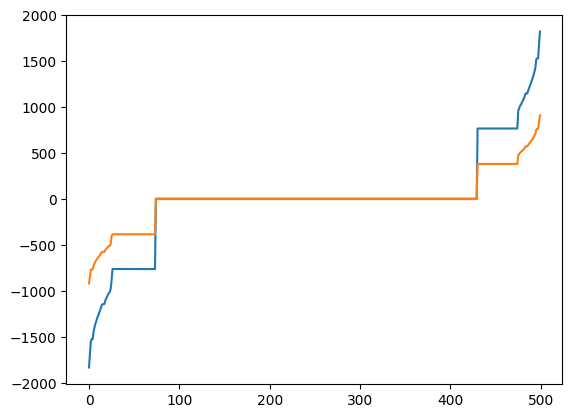

In [229]:
ARG = (theta[-1]-theta[-len(t)//4])//np.pi
plt.plot(ARG)
ARG = (theta[-1]-theta[-len(t)//8])//np.pi
plt.plot(ARG)


In [225]:
import TO_sim.Q_simul as QSIM
import TO_sim.analytical.sec_order_parameter2 as OSP2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from scipy.integrate import quad
from scipy import interpolate

In [226]:
m = 6
F_RMd,F_RMu,F_R0d,F_R0u =  OSP2.Make_R_function(m)
Qsimul = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=5000,start_p=True,seed=10)

sol = Qsimul.solve()

In [230]:
cluster_info = Qsimul.get_cluster(sum_time=500)
r_clu_info = Qsimul.get_r_clu(sum_time=500)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

In [237]:
ARG = (theta[-1]-theta[-5000])//np.pi
ARG =  np.where(ARG<0,ARG,ARG+1)
u,c = np.unique(ARG,return_counts=True)

I_c_o1 =np.where(c>1)
u_o1 = u[I_c_o1]
c_o1 = c[I_c_o1]
u_c = np.argsort(c_o1)[::-1]
UU = u_o1[u_c]


In [238]:
UU

array([   2., -190.,  194., -286., -381.,  385.,  289.])

In [239]:
arr = UU
main_value = np.min(abs(arr))
adjusted_arr = arr - main_value
print(main_value)
abs_arr = np.unique(np.abs(adjusted_arr))
abs_arr
group_threshold = 10
G = {}
GP = {}
GM = {}
GN = {}
G_num = 0
I_num = 1
for i in range(10):
    abs_arr = np.unique(np.abs(adjusted_arr))
    for num in abs_arr:
        abs_adjust_arr = np.abs(adjusted_arr)
        in_group = np.int64(np.round((abs_adjust_arr-num)/group_threshold)) * group_threshold
        is_group = np.where(abs(in_group) < 2)
        not_group = np.where(in_group >= 2)
        if len(is_group) != 0:
            Ra_arr = adjusted_arr[is_group]
            R = Ra_arr + main_value
            if G_num == 0:
                G[G_num,'I'], = np.where(np.isin(ARG,R))
                G[G_num,'R'] = R
                G_num +=1
            else:
                gp_idx, = np.where(Ra_arr>0)
                gm_idx, = np.where(Ra_arr<0)
                Rp = R[gp_idx]
                Rm = R[gm_idx]
                Ip, = np.where(np.isin(ARG,Rp))
                Im, = np.where(np.isin(ARG,Rm))
                if (len(Rp) !=0) and (len(Rm) != 0):
                    GP[G_num,'I'] = Ip
                    GM[G_num,'I'] = Im
                    GP[G_num,'R'] = Rp
                    GM[G_num,'R'] = Rm
                    G_num += 1
                elif (len(Rp) !=0):
                    GN[I_num,'I'] = Ip
                    GN[I_num,'R'] = Rp
                    I_num += 1
                else:
                    GN[I_num,'I'] = Im
                    GN[I_num,'R'] = Rm
                    I_num += 1

        adjusted_arr = adjusted_arr[not_group]
        break


2.0


In [240]:
GM

{(1,
  'I'): array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
        42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
        59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]),
 (1, 'R'): array([-190.]),
 (2, 'I'): array([14, 15, 16, 17]),
 (2, 'R'): array([-286.]),
 (3, 'I'): array([2, 3, 4]),
 (3, 'R'): array([-381.])}

In [241]:
# ARGs = []
# for i in range(len(t)-400):
#     A = (theta[400+i]-theta[i])//np.pi
#     A_m  = A - A[np.argmin(np.abs(A))]
#     ARGs.append(A_m)
# # ARGs = [(theta[5000+i]-theta[i])//np.pi - np.abs(theta[5000+i]-theta[i])//np.pi) for i in range(len(t)-5000)]

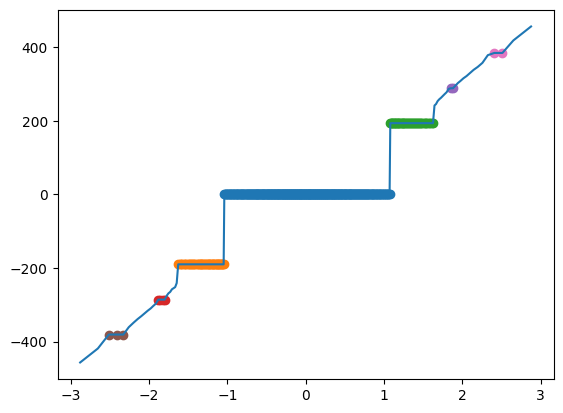

In [243]:
plt.plot(omega,ARG)
plt.scatter(omega[G[0,'I']],ARG[G[0,'I']])
plt.scatter(omega[GM[1,'I']],ARG[GM[1,'I']])
plt.scatter(omega[GP[1,'I']],ARG[GP[1,'I']])
plt.scatter(omega[GM[2,'I']],ARG[GM[2,'I']])
plt.scatter(omega[GP[2,'I']],ARG[GP[2,'I']])

plt.scatter(omega[GM[3,'I']],ARG[GM[3,'I']])
plt.scatter(omega[GP[3,'I']],ARG[GP[3,'I']])


# plt.scatter(omega[GM[4,'I']],ARG[GM[4,'I']])
# plt.scatter(omega[GP[4,'I']],ARG[GP[4,'I']])

In [244]:
def get_TM(x,step):
    x_c = np.cumsum(x,axis=0)
    if x.ndim == 2:
        x_m = (x_c[step:,:] - x_c[:-step,:])/step
    else:
        x_m = (x_c[step:] - x_c[:-step])/step
    return x_m

In [245]:
STEP =  100
ET = get_TM(theta,STEP)

In [249]:
r = np.sum(np.exp(1j*theta[:,]),axis=1)/N
rm = np.sum(np.exp(1j*ET[:,]),axis=1)/N
sigma = np.array([np.std(r[i:i+STEP]) for i in range(len(t)-STEP)])

In [250]:
r = np.sum(np.exp(1j*ET[:,]),axis=1)/N
r0 = np.sum(np.exp(1j*ET[:,G[0,'I']]),axis=1)/N
r1m = np.zeros_like(r0)* np.nan
r1p = np.zeros_like(r0)* np.nan
r2m = np.zeros_like(r0)* np.nan
r2p = np.zeros_like(r0)* np.nan

if G_num >=3:
    r1m = np.sum(np.exp(1j*ET[:,GM[1,'I']]),axis=1)/N
    r1p = np.sum(np.exp(1j*ET[:,GP[1,'I']]),axis=1)/N
    r2m = np.sum(np.exp(1j*ET[:,GM[2,'I']]),axis=1)/N
    r2p = np.sum(np.exp(1j*ET[:,GP[2,'I']]),axis=1)/N
elif G_num ==2:
    r1m = np.sum(np.exp(1j*ET[:,GM[1,'I']]),axis=1)/N
    r1p = np.sum(np.exp(1j*ET[:,GP[1,'I']]),axis=1)/N

In [247]:

r0 = np.mean(np.exp(1j*ET[:,G[0,'I']]),axis=1)
r1m = np.zeros_like(r0)* np.nan
r1p = np.zeros_like(r0)* np.nan
r2m = np.zeros_like(r0)* np.nan
r2p = np.zeros_like(r0)* np.nan

if G_num >=3:
    r1m = np.mean(np.exp(1j*ET[:,GM[1,'I']]),axis=1)
    r1p = np.mean(np.exp(1j*ET[:,GP[1,'I']]),axis=1)
    r2m = np.mean(np.exp(1j*ET[:,GM[2,'I']]),axis=1)
    r2p = np.mean(np.exp(1j*ET[:,GP[2,'I']]),axis=1)
elif G_num ==2:
    r1m = np.mean(np.exp(1j*ET[:,GM[1,'I']]),axis=1)
    r1p = np.mean(np.exp(1j*ET[:,GP[1,'I']]),axis=1)

In [248]:
r2p.shape

(79900,)

In [252]:
tm = get_TM(t,STEP)
# r0m = get_TM(r0,10)

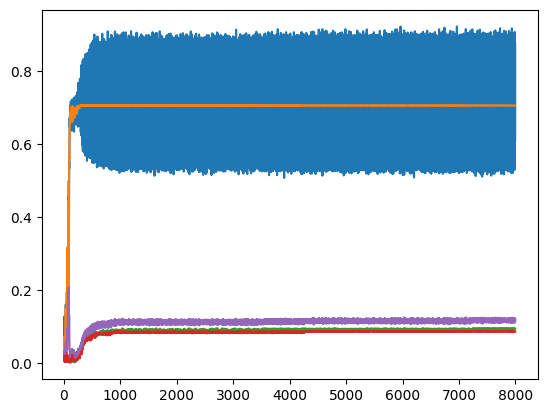

In [254]:
plt.plot(tm,abs(r))
plt.plot(tm,abs(r0))
plt.plot(tm,abs(r1m))
plt.plot(tm,abs(r1p))

plt.plot(tm,sigma)
# plt.plot(tm,abs(r2m))
# plt.plot(tm,abs(r2p))

In [22]:
STEP =  1000
EDT = get_TM(dtheta,STEP)

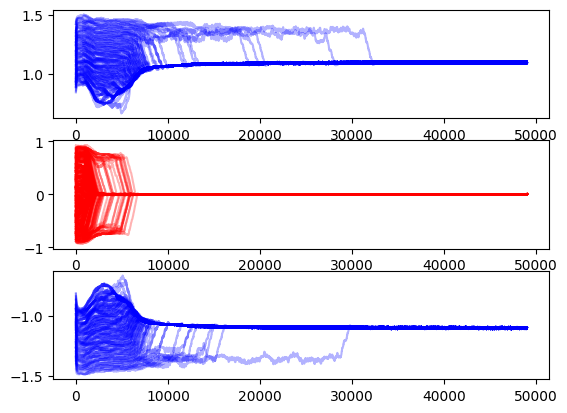

In [24]:
plt.subplot(311)
plt.plot(EDT[:,GP[1,'I']],color='blue',alpha=0.3);

plt.subplot(312)
plt.plot(EDT[:,G[0,'I']],color='red',alpha=0.3);
plt.subplot(313)
plt.plot(EDT[:,GM[1,'I']],color='blue',alpha=0.3);

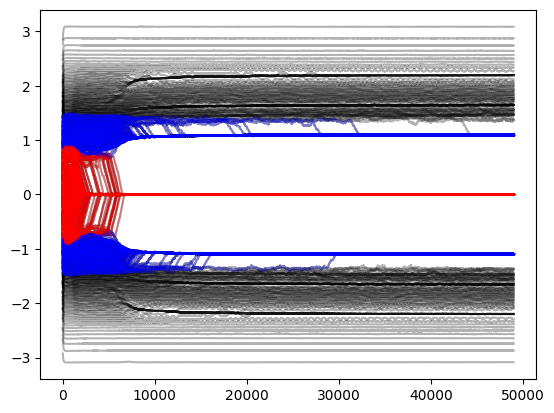

In [23]:
plt.plot(EDT,color='black',alpha=0.3);
plt.plot(EDT[:,G[0,'I']],color='red',alpha=0.3);
plt.plot(EDT[:,GP[1,'I']],color='blue',alpha=0.3);
plt.plot(EDT[:,GM[1,'I']],color='blue',alpha=0.3);
plt.show()

# 이론 그래프

In [194]:
import TO_sim.analytical.order_sec_parameter as OSP

In [214]:
m = 1
F_RMd2,F_RMu2,F_R0d2,F_R0u2 =  OSP.Make_R_function(m)

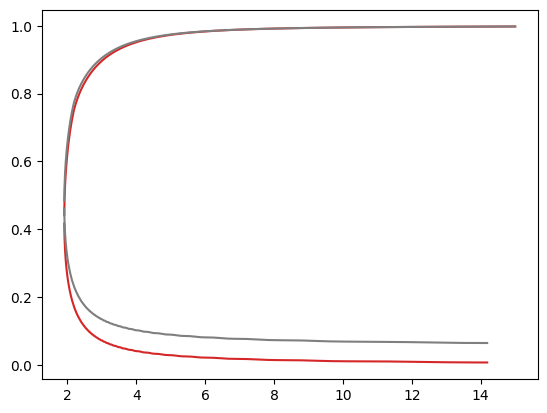

In [215]:
K_ = np.linspace(0,15,10000)

plt.plot(K_,F_RMd2(K_),color='tab:red')
plt.plot(K_,F_RMu2(K_),color='tab:red')

plt.plot(K_,F_R0d2(K_),color='tab:grey')
plt.plot(K_,F_R0u2(K_),color='tab:grey')


0.02

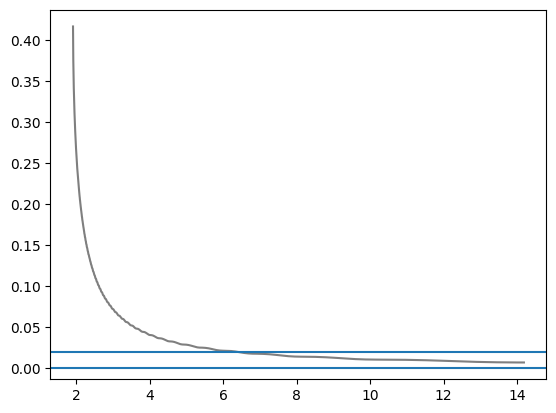

In [217]:
plt.plot(K_,F_RMd2(K_),color='tab:grey')
plt.plot(K_,F_RMd2(K_),color='tab:grey')
plt.axhline(0)
plt.axhline(0.02)
np.sqrt(2/N)